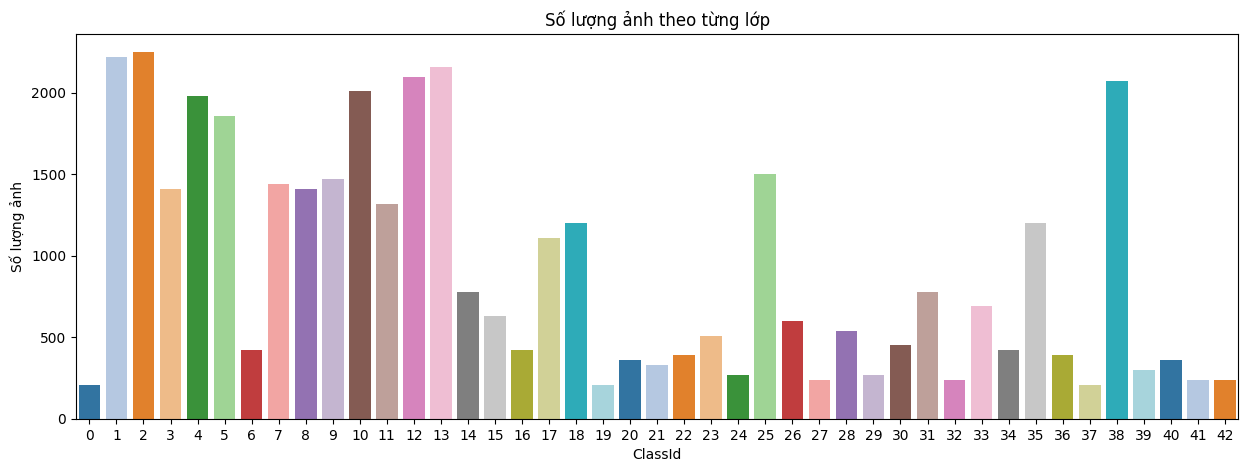

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


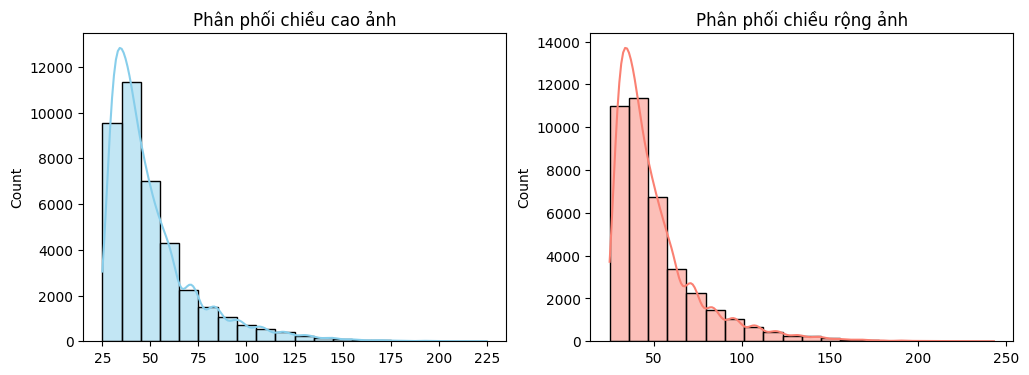

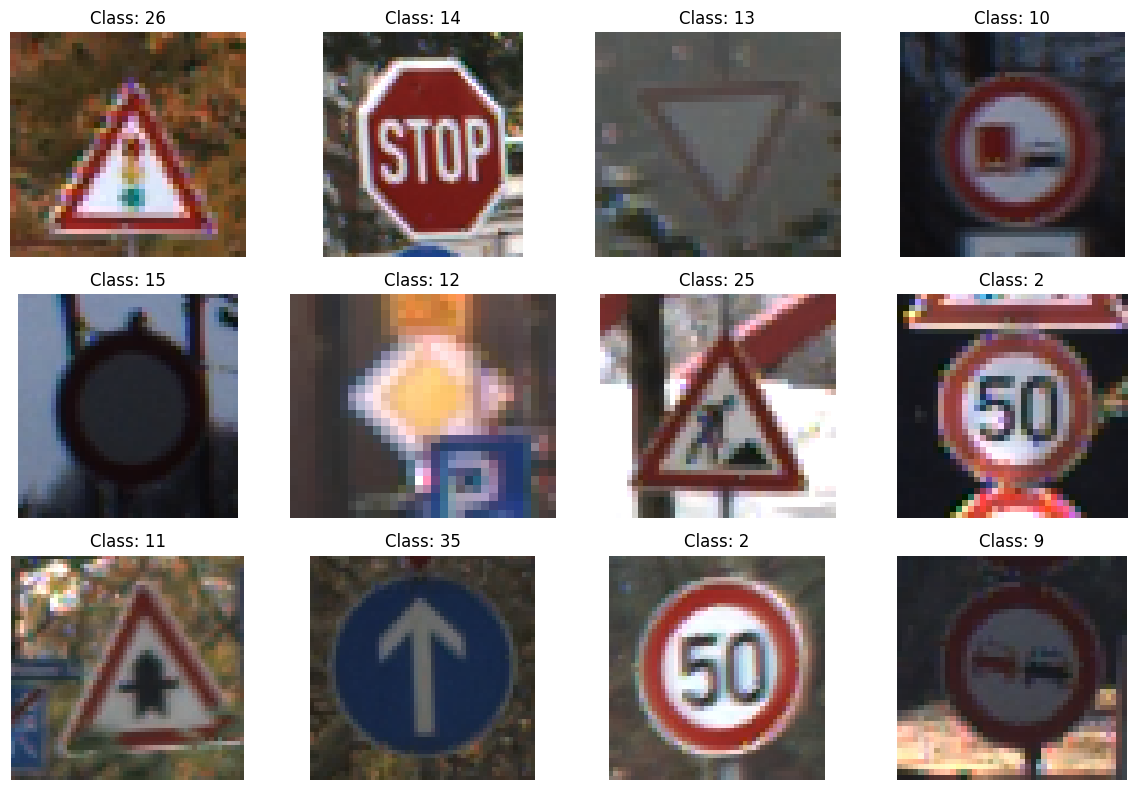

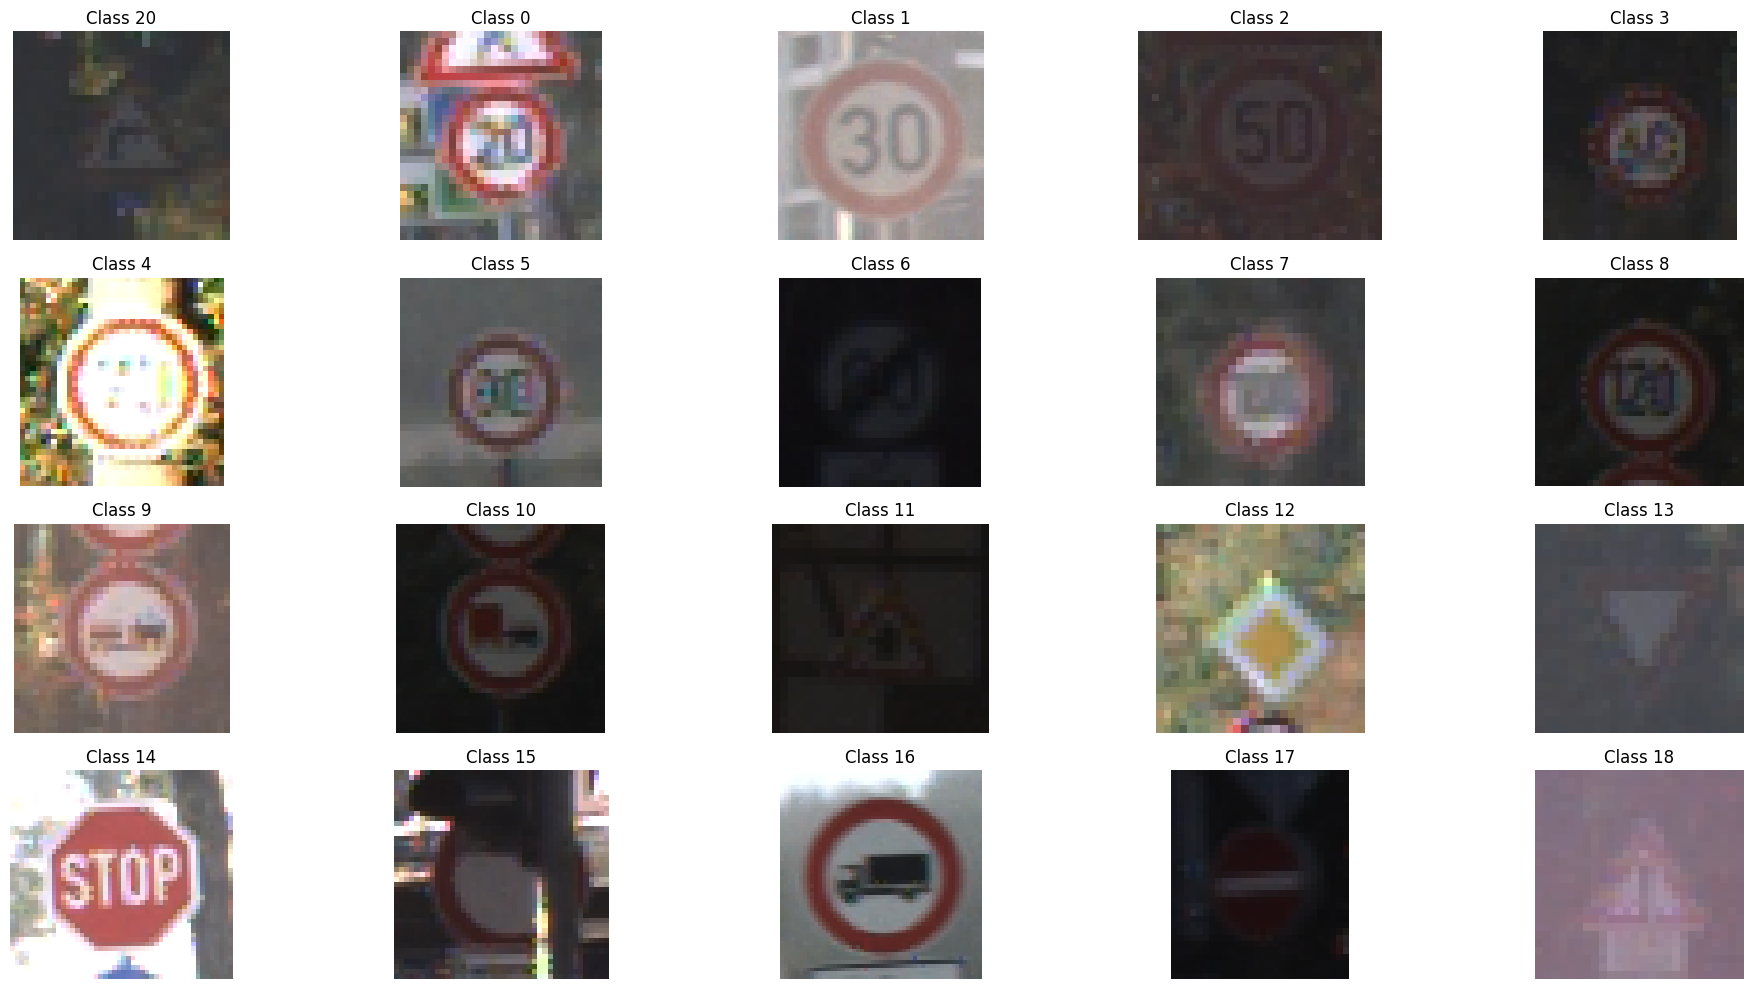

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data_dir = "/kaggle/input/gtsrb-german-traffic-sign"
train_df = pd.read_csv(f"{data_dir}/Train.csv")
test_df  = pd.read_csv(f"{data_dir}/Test.csv")

train_df["FullPath"] = train_df["Path"].apply(lambda p: os.path.join(data_dir, p.replace("\\","/")))
test_df["FullPath"]  = test_df["Path"].apply(lambda p: os.path.join(data_dir, p.replace("\\","/")))

plt.figure(figsize=(15,5))
sns.countplot(x='ClassId', data=train_df, palette="tab20")
plt.title("Số lượng ảnh theo từng lớp")
plt.xlabel("ClassId")
plt.ylabel("Số lượng ảnh")
plt.show()

train_df['img_shape'] = train_df['FullPath'].apply(lambda x: cv2.imread(x).shape[:2])
heights = [s[0] for s in train_df['img_shape']]
widths  = [s[1] for s in train_df['img_shape']]

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(heights, bins=20, kde=True, color='skyblue')
plt.title("Phân phối chiều cao ảnh")
plt.subplot(1,2,2)
sns.histplot(widths, bins=20, kde=True, color='salmon')
plt.title("Phân phối chiều rộng ảnh")
plt.show()

sample_df = train_df.sample(12, random_state=42)
plt.figure(figsize=(12,8))
for i, row in enumerate(sample_df.itertuples()):
    img = cv2.imread(row.FullPath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,4,i+1)
    plt.imshow(img)
    plt.title(f"Class: {row.ClassId}")
    plt.axis('off')
plt.tight_layout()
plt.show()

unique_classes = train_df['ClassId'].unique()
plt.figure(figsize=(20,10))
for i, class_id in enumerate(unique_classes[:20]):  
    img_path = train_df[train_df['ClassId']==class_id]['FullPath'].iloc[0]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(4,5,i+1)
    plt.imshow(img)
    plt.title(f"Class {class_id}")
    plt.axis('off')
plt.tight_layout()
plt.show()


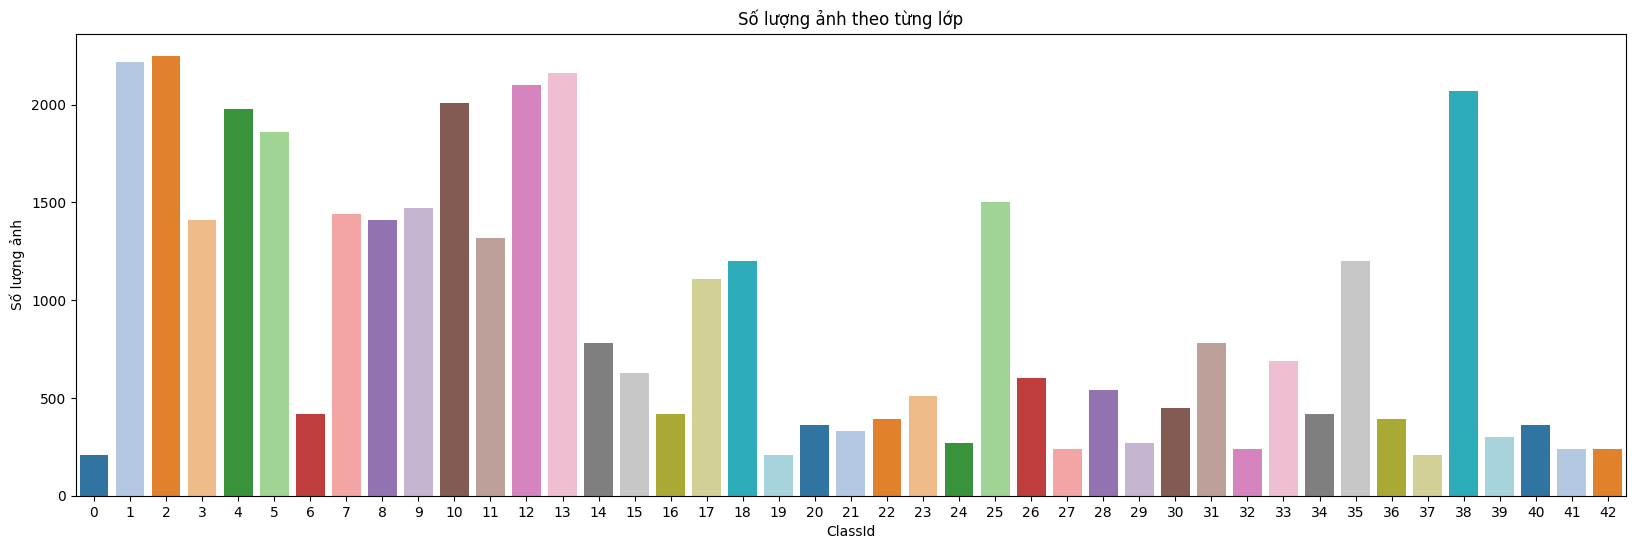

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


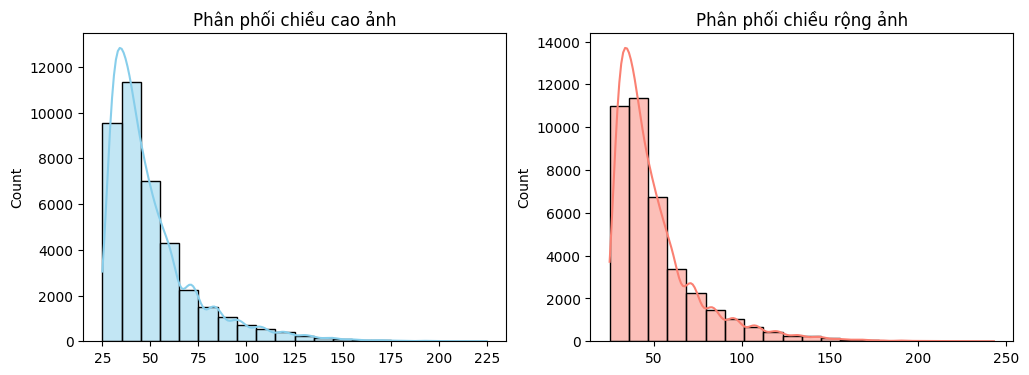

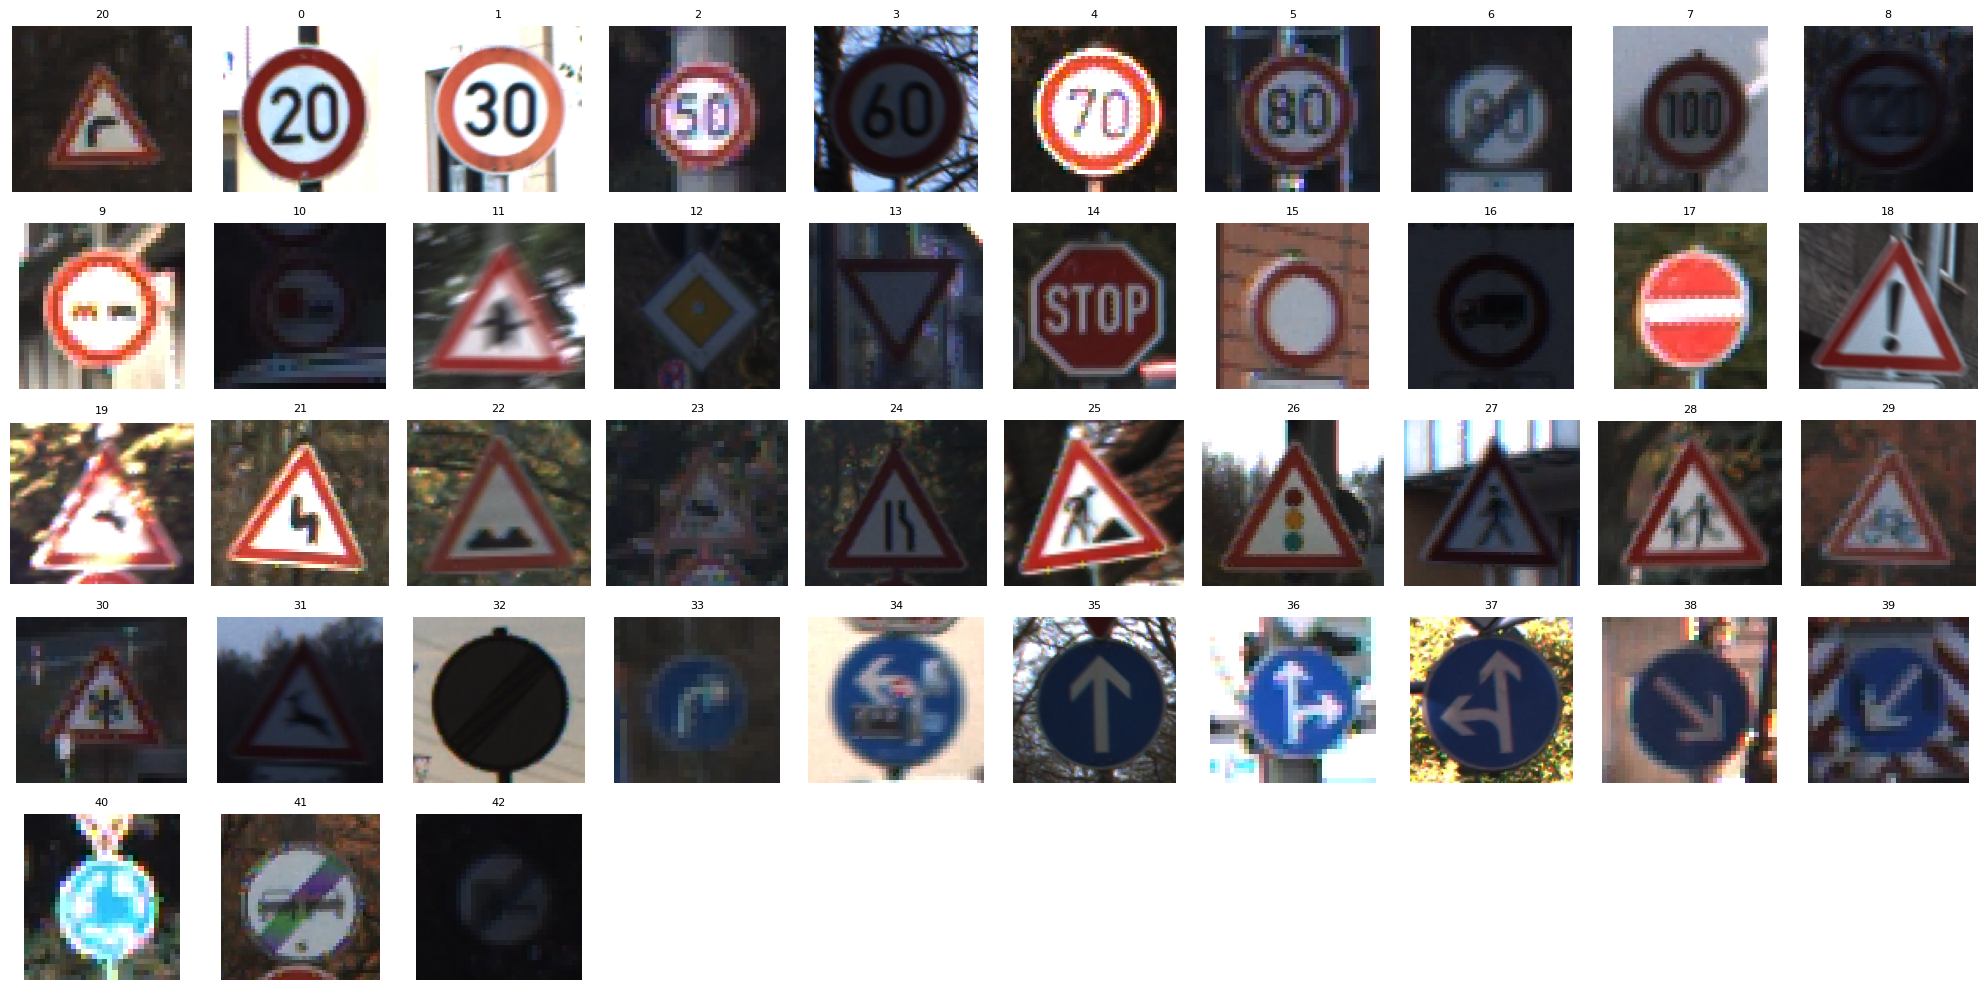

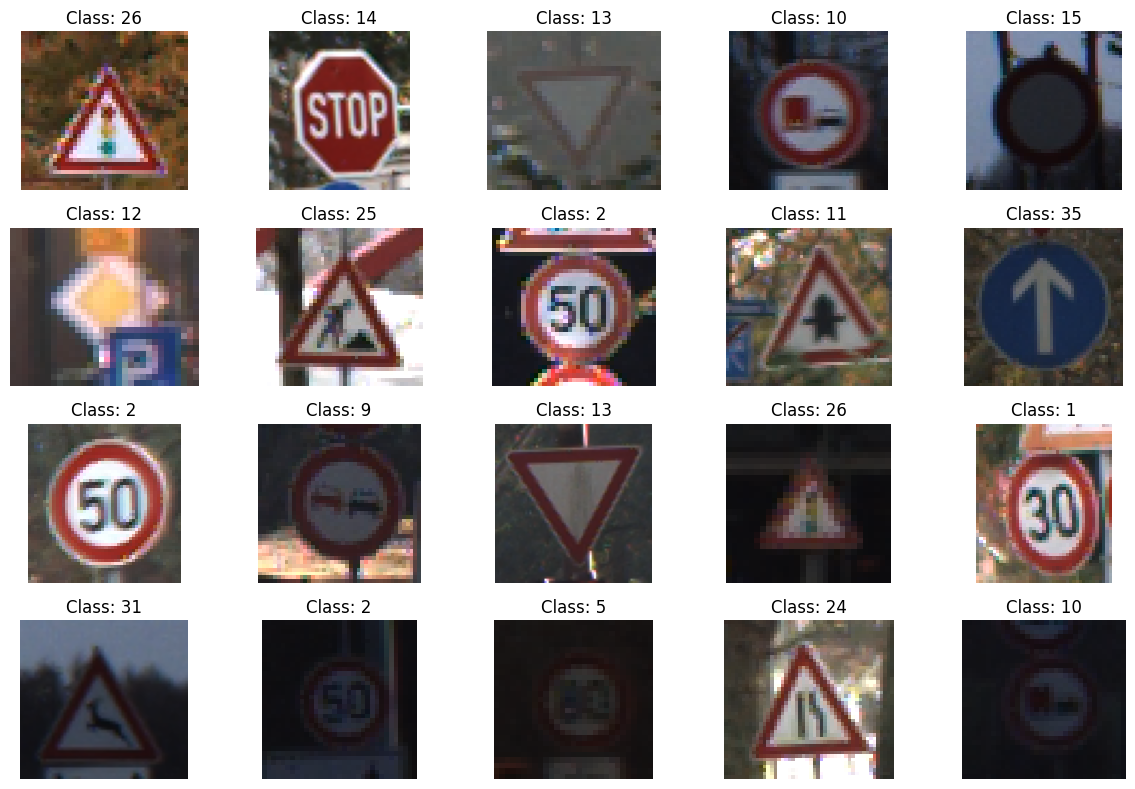

In [ ]:

plt.figure(figsize=(20,6))
sns.countplot(x='ClassId', data=train_df, palette="tab20")
plt.title("Số lượng ảnh theo từng lớp")
plt.xlabel("ClassId")
plt.ylabel("Số lượng ảnh")
plt.show()

train_df['img_shape'] = train_df['FullPath'].apply(lambda x: cv2.imread(x).shape[:2])
heights = [s[0] for s in train_df['img_shape']]
widths  = [s[1] for s in train_df['img_shape']]

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(heights, bins=20, kde=True, color='skyblue')
plt.title("Phân phối chiều cao ảnh")
plt.subplot(1,2,2)
sns.histplot(widths, bins=20, kde=True, color='salmon')
plt.title("Phân phối chiều rộng ảnh")
plt.show()

unique_classes = train_df['ClassId'].unique()
num_cols = 10
num_rows = (len(unique_classes) + num_cols - 1) // num_cols
plt.figure(figsize=(num_cols*2, num_rows*2))

for i, class_id in enumerate(unique_classes):
    img_path = train_df[train_df['ClassId']==class_id]['FullPath'].sample(1).iloc[0]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(img)
    plt.title(f"{class_id}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

sample_df = train_df.sample(20, random_state=42)
plt.figure(figsize=(12,8))
for i, row in enumerate(sample_df.itertuples()):
    img = cv2.imread(row.FullPath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(4,5,i+1)
    plt.imshow(img)
    plt.title(f"Class: {row.ClassId}")
    plt.axis('off')
plt.tight_layout()
plt.show()


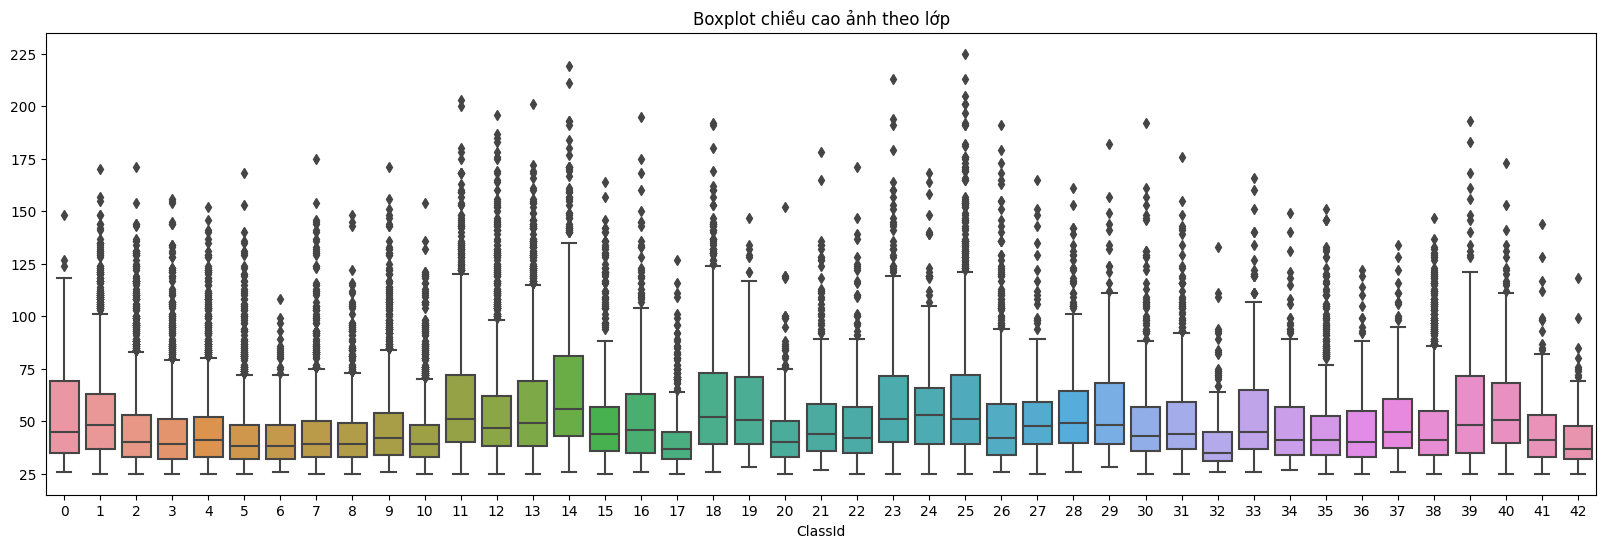

In [3]:
plt.figure(figsize=(20,6))
sns.boxplot(x='ClassId', y=[s[0] for s in train_df['img_shape']], data=train_df)
plt.title("Boxplot chiều cao ảnh theo lớp")
plt.show()


In [ ]:
class_counts = train_df['ClassId'].value_counts()
mean_count = int(class_counts.mean())  
print("Số ảnh trung bình mỗi lớp:", mean_count)

minor_classes = class_counts[class_counts < mean_count].index.tolist()
print("Các lớp ít dữ liệu:", minor_classes)

augment = transforms.Compose([
    transforms.RandomRotation(15),  
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  
])

augmented_images = []
augmented_labels = []

for class_id in tqdm(minor_classes, desc="Augmenting minor classes"):
    class_imgs = train_df[train_df['ClassId']==class_id]['FullPath'].tolist()
    num_to_create = mean_count - len(class_imgs)  

    for _ in range(num_to_create):
        img_path = random.choice(class_imgs)
        img = Image.open(img_path).convert("RGB")
        img_aug = augment(img)

        
        img_aug_np = np.array(img_aug)
        augmented_images.append(img_aug_np)
        augmented_labels.append(class_id)

os.makedirs("augmented", exist_ok=True)
for i, (img, label) in enumerate(zip(augmented_images, augmented_labels)):
    save_path = os.path.join("augmented", f"class{label}_{i}.png")
    cv2.imwrite(save_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

print(f"Tạo thêm {len(augmented_images)} ảnh cho các lớp ít dữ liệu.")


Số ảnh trung bình mỗi lớp: 911
Các lớp ít dữ liệu: [14, 31, 33, 15, 26, 28, 23, 30, 6, 16, 34, 22, 36, 20, 40, 21, 39, 29, 24, 42, 32, 27, 41, 0, 19, 37]


Augmenting minor classes: 100%|██████████| 26/26 [00:23<00:00,  1.11it/s]


Tạo thêm 13187 ảnh cho các lớp ít dữ liệu.


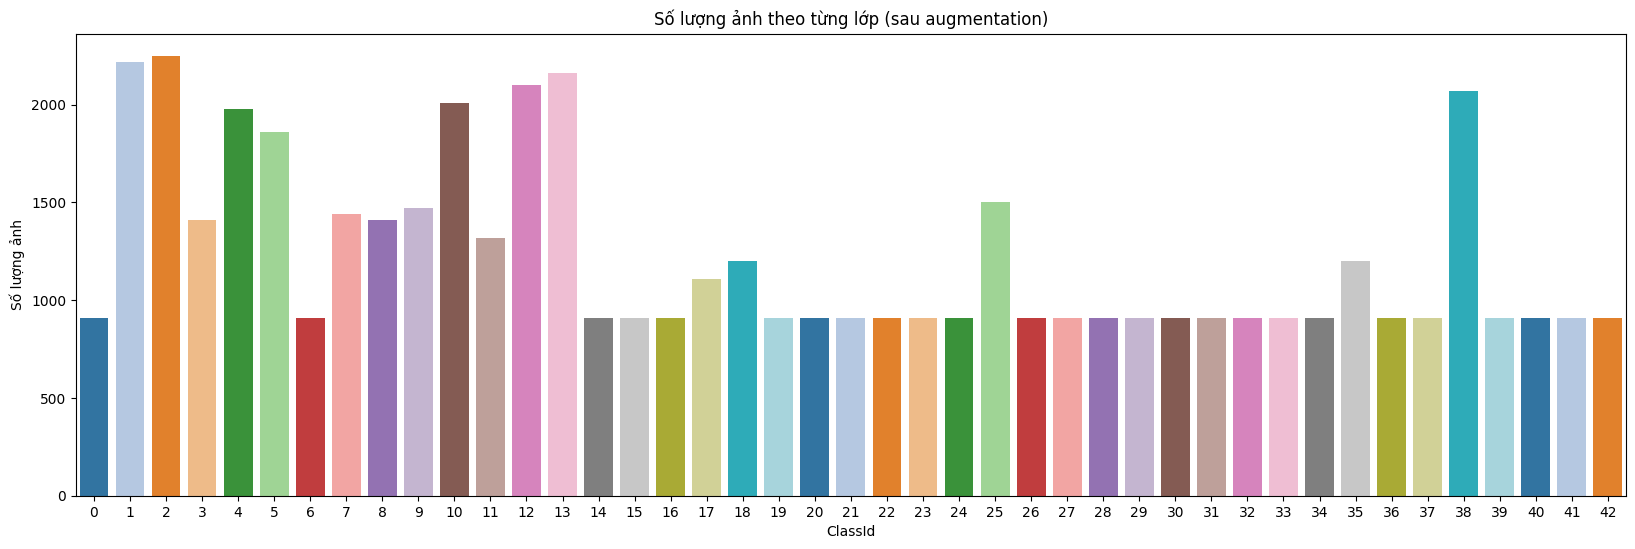

In [ ]:
aug_df = pd.DataFrame({
    "ClassId": augmented_labels,
    "FullPath": [os.path.join("augmented", f"class{label}_{i}.png") 
                 for i, label in enumerate(augmented_labels)]
})

train_augmented_df = pd.concat([train_df[['ClassId', 'FullPath']], aug_df], ignore_index=True)

plt.figure(figsize=(20,6))
sns.countplot(x='ClassId', data=train_augmented_df, palette="tab20")
plt.title("Số lượng ảnh theo từng lớp (sau augmentation)")
plt.xlabel("ClassId")
plt.ylabel("Số lượng ảnh")
plt.show()
